# TD4 : PCA

## 1. Python warm up : PCA by hand

In [123]:
import numpy as np
import pandas as pd
import scipy
import scipy.linalg as linalg
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [52]:
X = np.random.multivariate_normal([1, 3], [[2, 1], [1, 2]], 100)
X.shape
X.mean(axis=0) 

array([1.13639554, 3.21319797])

Text(0.5, 1.0, 'Data vizualisation of X')

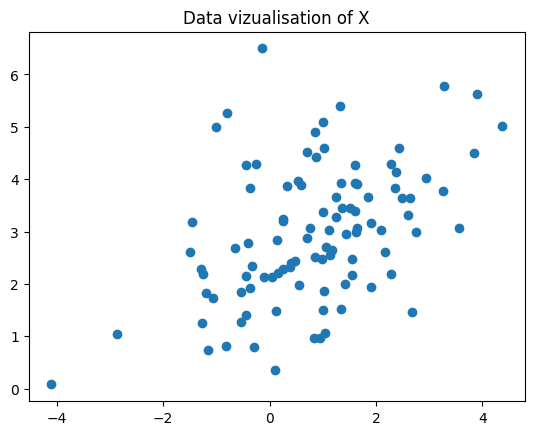

In [39]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data vizualisation of X")

In [22]:
linalg.svd(X)

array([33.24575151, 11.97950429])

In [23]:
linalg.eigh(X.T @ X) #eigh to have real values

array([ 143.50852313, 1105.27999363])

## 2. PCA for dimension reduction

In [105]:
from sklearn.datasets import fetch_openml

housing = fetch_openml(name = "house_prices", as_frame = True)
X = housing.frame
X = X.loc[:, ~X.isna().any() & (X.dtypes.astype(str).isin(["float64", "int64"]))]
y = housing.target

In [106]:
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [107]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [108]:
X0 = X - X.mean(axis = 0)

standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X0)
pca = PCA(n_components=35)
C = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_
explained_var_cumsum = np.cumsum(explained_var)

### Check by hand if axis computed by sklearn are correct

In [109]:
pca.components_[0]

array([-0.00147988, -0.01479149,  0.11124649,  0.30452157, -0.0694668 ,
        0.22176389,  0.20385729,  0.14103364, -0.00805236,  0.11355923,
        0.25804164,  0.25849619,  0.14267727, -0.00861079,  0.30790009,
        0.07654104, -0.01128415,  0.26061237,  0.12746985,  0.11661244,
       -0.01846649,  0.24782422,  0.19312498,  0.27949148,  0.27335488,
        0.13542617,  0.15062854, -0.06628972,  0.01569315,  0.03719311,
        0.05106112, -0.0095763 ,  0.02418699, -0.01483849,  0.33378817])

In [117]:
n = X.shape[0]
V = 1/(n-1) * X_scaled.T @ X_scaled
vp, U = linalg.eigh(V)
U[:, -1]

array([ 0.00147988,  0.01479149, -0.11124649, -0.30452157,  0.0694668 ,
       -0.22176389, -0.20385729, -0.14103364,  0.00805236, -0.11355923,
       -0.25804164, -0.25849619, -0.14267727,  0.00861079, -0.30790009,
       -0.07654104,  0.01128415, -0.26061237, -0.12746985, -0.11661244,
        0.01846649, -0.24782422, -0.19312498, -0.27949148, -0.27335488,
       -0.13542617, -0.15062854,  0.06628972, -0.01569315, -0.03719311,
       -0.05106112,  0.0095763 , -0.02418699,  0.01483849, -0.33378817])

### Determine optimal number of components

Text(0, 0.5, 'Variance expliquée')

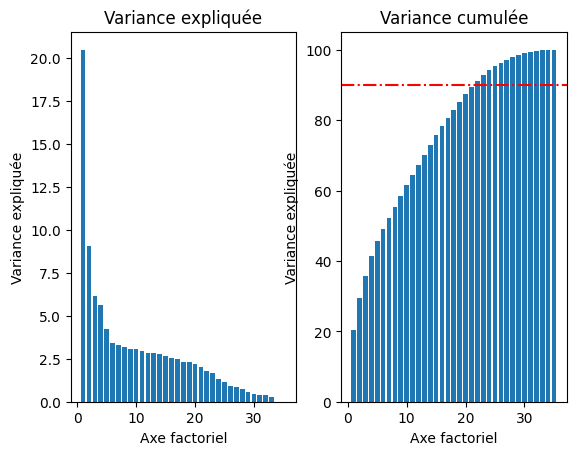

In [118]:
fig, axs = plt.subplots(1, 2)

axs[0].bar(range(1, X.shape[1] + 1), explained_var * 100)
axs[0].set_title("Variance expliquée")
axs[0].set_xlabel("Axe factoriel")
axs[0].set_ylabel("Variance expliquée (en %)")

axs[1].bar(range(1, X.shape[1] + 1), explained_var_cumsum * 100)
axs[1].axhline(y=90, color='r', linestyle='-.')
axs[1].set_title("Variance cumulée")
axs[1].set_xlabel("Axe factoriel")
axs[1].set_ylabel("Variance expliquée (en %)")

In [119]:
pca = PCA()
lin = LinearRegression()
pca_lin = LinearRegression()
pca_lin = Pipeline([("scale", StandardScaler()), ("pca", pca), ("lin", lin)])
clf = GridSearchCV(
    estimator = pca_lin,
    cv = 10,
    param_grid = dict(pca__n_components = range(1, X.shape[1] + 1))
)
clf.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lin', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 36)})

In [121]:
clf.best_params_

{'pca__n_components': 33}

## 3. Problem : band reduction in multispectral images

In [127]:
data = scipy.io.loadmat("Indian_pines.mat")['indian_pines']
data

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [2580, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [2570, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[2576, 4388, 4334, ..., 1030, 1006, 1015],
        [2747, 4264, 4592, ..., 1039, 1015, 1020],
        [2750, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [2744, 4268, 4597, ..., 1019, 1016, 1010]],

       [[2744, 4146, 4416, ..., 1029, 1025, 1010],
        [2576, 4389, 4416, ..., 1021, 1011, 1000],
        [2744, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [2570, 4266, 4509, ..., 1025, 1010, 1005],
        [2576, 4262, 4496, ..., 1029, 1020, 1005],
        [2742, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

In [128]:
data.shape

(145, 145, 220)

In [132]:
data_lin = data.reshape((-1, 220))
data_lin

array([[3172, 4142, 4506, ..., 1020, 1020, 1005],
       [2580, 4266, 4502, ..., 1029, 1020, 1000],
       [3687, 4266, 4421, ..., 1030, 1016, 1009],
       ...,
       [3153, 3864, 4282, ..., 1008, 1000, 1009],
       [3155, 4104, 4106, ..., 1005, 1003, 1004],
       [3323, 3860, 4197, ..., 1004, 1000, 1000]], dtype=uint16)

In [133]:
data_lin.shape

(21025, 220)

In [138]:
pca = PCA(n_components=3)
pca = Pipeline([("scale", MinMaxScaler()), ("pca", pca)])

C = pca.fit_transform(data_lin)
C = C.reshape((145, 145, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


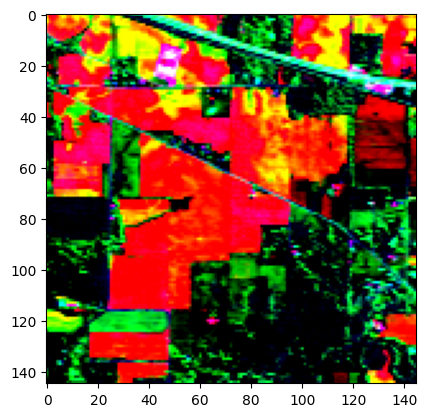

In [139]:
plt.imshow(C)